<a href="https://colab.research.google.com/github/sumanth3195/Elevate_Labs_Internship/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")  # update filename if needed
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df.describe(include='all')



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [70]:
df = df.drop(['Age', 'Cabin' , 'Name', 'Ticket' ], axis=1)


In [71]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [72]:
df = df.dropna(axis=0)

In [73]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [74]:


df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df,
                    columns=['Pclass', 'Embarked'],
                    prefix=['Pclass', 'Emb'],
                    drop_first=True)

print(df.head())


   PassengerId  Survived  Sex  SibSp  Parch     Fare  Pclass_2  Pclass_3  \
0            1         0    0      1      0   7.2500     False      True   
1            2         1    1      1      0  71.2833     False     False   
2            3         1    1      0      0   7.9250     False      True   
3            4         1    1      1      0  53.1000     False     False   
4            5         0    0      0      0   8.0500     False      True   

   Emb_Q  Emb_S  
0  False   True  
1  False  False  
2  False   True  
3  False   True  
4  False   True  


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Sex          889 non-null    int64  
 3   SibSp        889 non-null    int64  
 4   Parch        889 non-null    int64  
 5   Fare         889 non-null    float64
 6   Pclass_2     889 non-null    bool   
 7   Pclass_3     889 non-null    bool   
 8   Emb_Q        889 non-null    bool   
 9   Emb_S        889 non-null    bool   
dtypes: bool(4), float64(1), int64(5)
memory usage: 52.1 KB


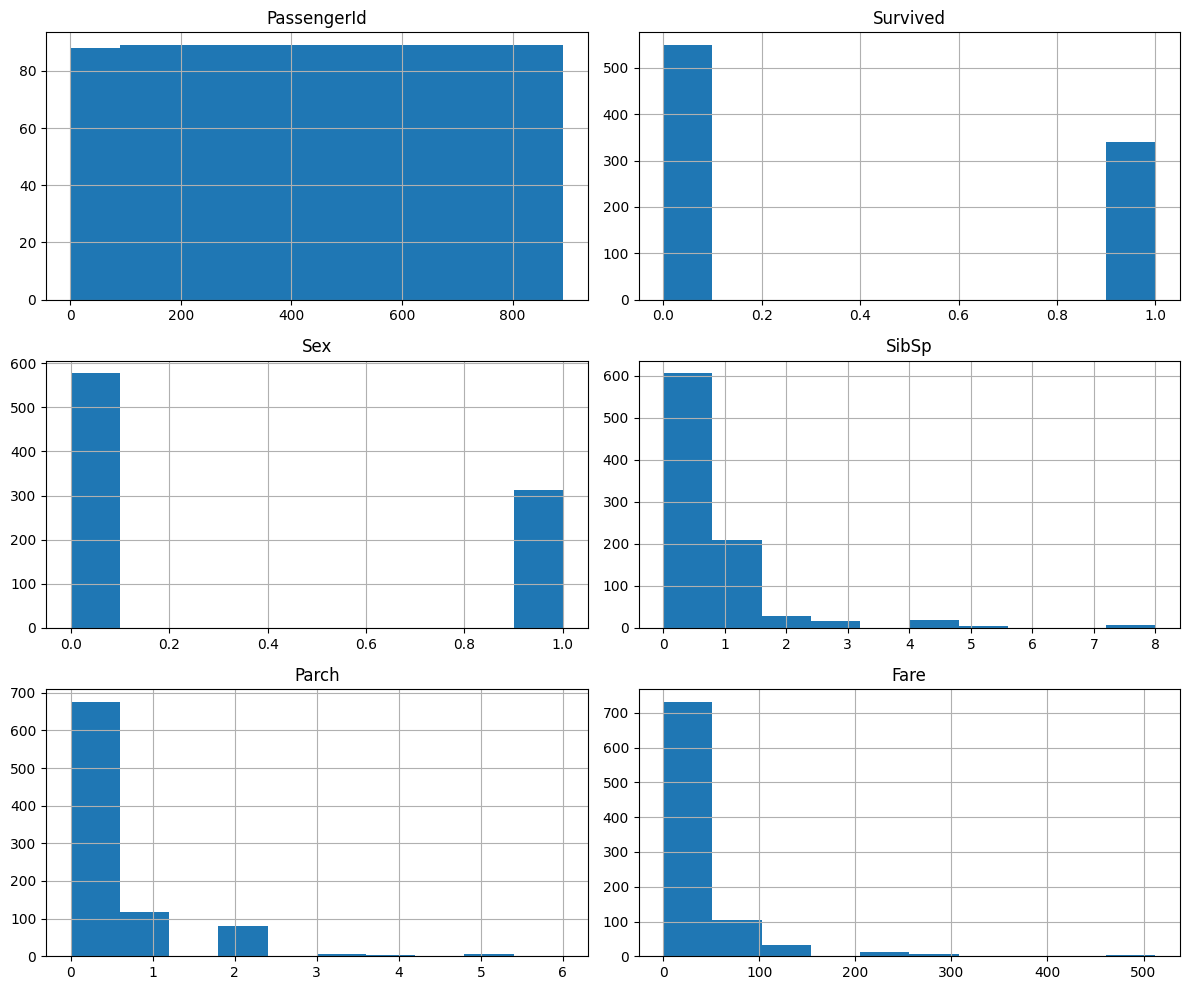

In [76]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


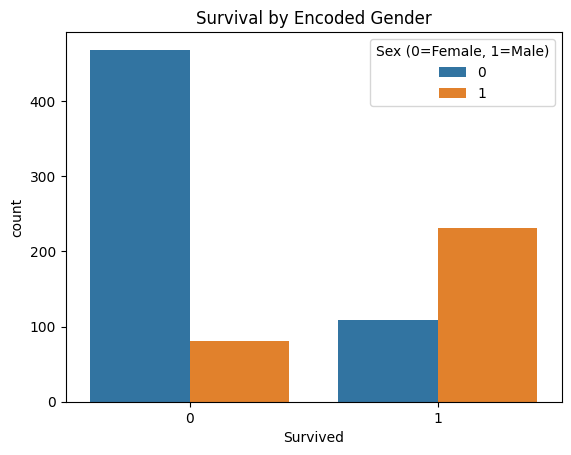

In [83]:
# 2. Survival by Gender (encoded as 0=female, 1=male)
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Encoded Gender')
plt.legend(title='Sex (0=Female, 1=Male)')
plt.show()

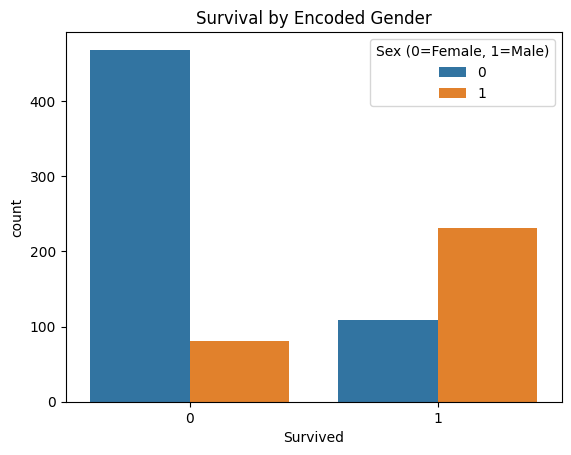

In [84]:
# 2. Survival by Gender (encoded as 0=female, 1=male)
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Encoded Gender')
plt.legend(title='Sex (0=Female, 1=Male)')
plt.show()

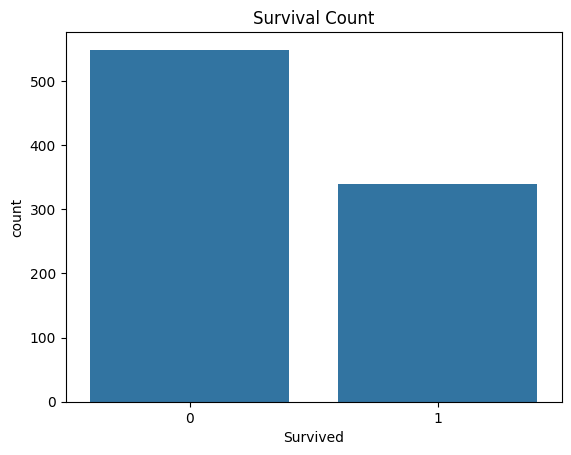

In [79]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()


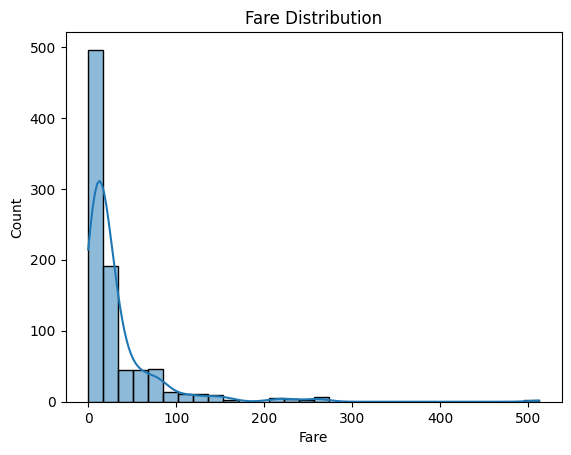

In [88]:
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

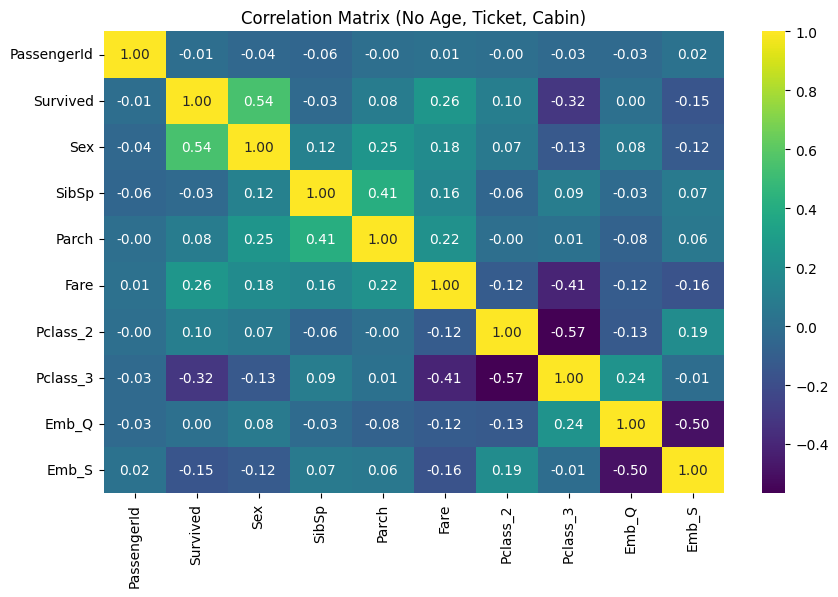

In [89]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix (No Age, Ticket, Cabin)')
plt.show()

In [90]:
print("\n🔹 Skewness:")
print(df.skew(numeric_only=True))


🔹 Skewness:
PassengerId    0.000000
Survived       0.484568
Sex            0.625625
SibSp          3.691058
Parch          2.745160
Fare           4.801440
Pclass_2       1.448999
Pclass_3      -0.210734
Emb_Q          2.944406
Emb_S         -1.006192
dtype: float64
